In [1]:
from deepx.nn import available_models
from deepx.tasks import SegmentationTask

In [2]:
model = SegmentationTask.load_from_checkpoint(
    checkpoint_path="C:/Users/tomkj/Development/Vision/experiments/684635924494621264/df8a05d15937406c9405819ef6df3aac/checkpoints/epoch=20-step=966.ckpt",
    dataset_name="voc",
    model="unet",
    data_dir="",
)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/tomkj/Development/Vision/experiments/684635924494621264/df8a05d15937406c9405819ef6df3aac/checkpoints/epoch=20-step=966.ckpt'

In [ ]:
model.eval()

In [ ]:
from PIL import Image
import numpy as np
import torch

In [ ]:
img = Image.open("../../data/images/car.jpg")

In [ ]:
img

In [ ]:
transform = model.dataset["transform"]

In [ ]:
im = transform(img)

In [ ]:
im.shape

In [ ]:
result = model.predict_step(im.unsqueeze(0), None)

In [ ]:
result.shape

In [5]:
import matplotlib.pyplot as plt

In [ ]:
result.unique()

In [6]:
import numpy as np

npimg = np.load("C:/Users/tomkj/Development/Vision/data/images/car_pred.npy")

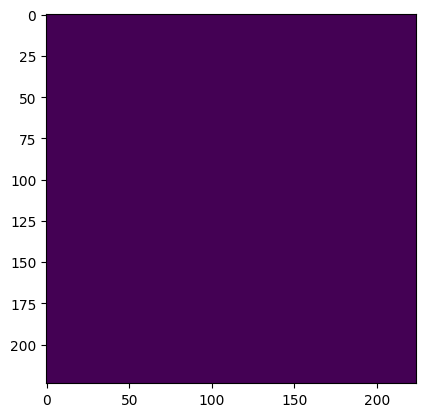

In [7]:
plt.imshow(npimg.squeeze())

In [8]:
npimg.shape

(224, 224)

In [13]:
np.unique(npimg, return_counts=True)

(array([0], dtype=int64), array([50176], dtype=int64))

In [15]:
npimg.max()

0